In [1]:
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

#가위,바위,보 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/test/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/test/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/test/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [3]:
def load_data(img_path_, number_of_data=600):
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for img_path in img_path_:
        for file in glob.iglob(img_path+'/scissor/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=0   # 가위 : 0
            idx=idx+1

        for file in glob.iglob(img_path+'/rock/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    
            labels[idx]=1   # 바위 : 1
            idx=idx+1  

        for file in glob.iglob(img_path+'/paper/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img   
            labels[idx]=2   # 보 : 2
            idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/test" 
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper"
image_path = [image_dir_path,image_dir_path2]##직접 찍은 데이터와 기존데이터를 합쳐 사용

(x_train, y_train)=load_data(image_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 600 입니다.


>구글의 teachable machine을 사용하여 직접 찍은 데이터를 rock_scissor_paper 디렉토리 안에 저장하였습니다.
 lms노드의 예제 데이터도 다운로드받아 test디렉토리 내에 저장하였습니다.

라벨:  0


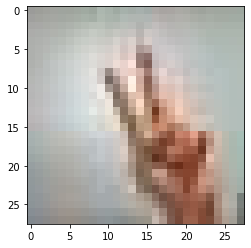

In [4]:
plt.imshow(x_train[333])
print('라벨: ', y_train[333])

In [5]:
print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


In [6]:
n_channel_1=256 #파라메터값을 적절히 조정
n_channel_2=128
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [7]:
model.compile(optimizer='rmsProp',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
19/19 [==============================] - 30s 18ms/step - loss: 1.2328 - accuracy: 0.3500
Epoch 2/20
19/19 [==============================] - 0s 5ms/step - loss: 1.0186 - accuracy: 0.4600
Epoch 3/20
19/19 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.6450
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.7100
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7800
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.8183
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8517
Epoch 8/20
19/19 [==============================] - 0s 5ms/step - loss: 0.3012 - accuracy: 0.8800
Epoch 9/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9483
Epoch 10/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.9417
Epoch 11/20
19/19

In [8]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/test/test"
(x_test, y_test)=load_data([image_dir_path])
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 300 입니다.


In [9]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 [==============================] - 0s 2ms/step - loss: 3.2123 - accuracy: 0.6550
test_loss: 3.2122504711151123 
test_accuracy: 0.6549999713897705


---
# 회고

>직접 찍은 데이터로만 학습했을 경우 과적합이 일어나 lms 노드의 데이터를 추가하여 학습을 진행하였습니다.
 프로젝트를 진행하면서 인공지능에 대한 기본적인 이해를 할 수 있었습니다.
 또한 구글의 teachable machine을 직접 다뤄볼 수 있어 좋았습니다.